<a href="https://colab.research.google.com/github/joaopdss/fer-playing-games/blob/main/FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Datasets/fer_dataset.zip -d /content/

A saída de streaming foi truncada nas últimas 5000 linhas.
 extracting: /content/dataset/surprise/image0012603.jpg  
 extracting: /content/dataset/surprise/image0012648.jpg  
 extracting: /content/dataset/surprise/image0012672.jpg  
 extracting: /content/dataset/surprise/image0012715.jpg  
 extracting: /content/dataset/surprise/image0012758.jpg  
 extracting: /content/dataset/surprise/image0012808.jpg  
 extracting: /content/dataset/surprise/image0012820.jpg  
 extracting: /content/dataset/surprise/image0012833.jpg  
 extracting: /content/dataset/surprise/image0012842.jpg  
 extracting: /content/dataset/surprise/image0012865.jpg  
 extracting: /content/dataset/surprise/image0012875.jpg  
 extracting: /content/dataset/surprise/image0012942.jpg  
 extracting: /content/dataset/surprise/image0012997.jpg  
 extracting: /content/dataset/surprise/image0013015.jpg  
 extracting: /content/dataset/surprise/image0013018.jpg  
 extracting: /content/dataset/surprise/image0013058.jpg  
 extracting: 

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
train_data, val_data = tf.keras.utils.image_dataset_from_directory(directory="/content/dataset",
                                            color_mode="rgb",
                                            label_mode="categorical",
                                            batch_size=32,
                                            image_size=(48, 48),
                                            shuffle=True,
                                            seed=42,
                                            validation_split=0.2,
                                            subset="both")

Found 40476 files belonging to 5 classes.
Using 32381 files for training.
Using 8095 files for validation.


In [5]:
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image,label

train_data = train_data.map(process)
val_data = val_data.map(process)

In [ ]:
train_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

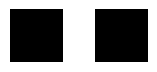

In [ ]:
for images, labels in train_data.take(1):
  for i in range(2):
    ax = plt.subplot(6, 6, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(48, 48, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(5, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=4, min_lr=0.00001)

# Fit the model
model_1.fit(train_data, epochs=35, callbacks=[reduce_lr, checkpoint_callback], validation_data=val_data)

Epoch 1/35
1012/1012 [==============================] - ETA: 0s - loss: 2.0259 - accuracy: 0.2423
Epoch 1: val_loss improved from inf to 6.74454, saving model to checkpoint/


1012/1012 [==============================] - 117s 110ms/step - loss: 2.0259 - accuracy: 0.2423 - val_loss: 6.7445 - val_accuracy: 0.2557 - lr: 0.0010
Epoch 2/35
1012/1012 [==============================] - ETA: 0s - loss: 1.5994 - accuracy: 0.2551
Epoch 2: val_loss did not improve from 6.74454
1012/1012 [==============================] - 109s 108ms/step - loss: 1.5994 - accuracy: 0.2551 - val_loss: 7.4942 - val_accuracy: 0.2557 - lr: 0.0010
Epoch 3/35
1012/1012 [==============================] - ETA: 0s - loss: 1.5972 - accuracy: 0.2556
Epoch 3: val_loss improved from 6.74454 to 6.66852, saving model to checkpoint/


1012/1012 [==============================] - 109s 108ms/step - loss: 1.5972 - accuracy: 0.2556 - val_loss: 6.6685 - val_accuracy: 0.2557 - lr: 0.0010
Epoch 4/35
1012/1012 [==============================] - ETA: 0s - loss: 1.5972 - accuracy: 0.2554
Epoch 4: val_loss improved from 6.66852 to 3.05034, saving model to checkpoint/


1012/1012 [==============================] - 108s 107ms/step - loss: 1.5972 - accuracy: 0.2554 - val_loss: 3.0503 - val_accuracy: 0.2545 - lr: 0.0010
Epoch 5/35
 448/1012 [============>.................] - ETA: 54s - loss: 1.5988 - accuracy: 0.2515

KeyboardInterrupt: ignored

In [38]:
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten, SeparableConv2D, Input, BatchNormalization, GlobalAveragePooling2D
# from tensorflow.keras_vggface.vggface import VGGFace

input_shape = (48, 48, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=input_shape)
base_model.trainable = False

inputs = tf.keras.Input(shape=input_shape)
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Flatten()(x)
# x = Dropout(0.7)(x)
# x = Dense(4096, activation='relu')(x)
# x = Dropout(0.7)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.7)(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
# x = Dropout(0.7)(x)
x = tf.keras.layers.Dense(5)(x)
outputs = tf.keras.layers.Activation("softmax")(x)
model = tf.keras.Model(inputs, outputs)

# Compile model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [39]:
model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
1012/1012 [==============================] - 30s 23ms/step - loss: 1.3907 - accuracy: 0.4172 - val_loss: 1.3426 - val_accuracy: 0.4409
Epoch 2/10
1012/1012 [==============================] - 21s 20ms/step - loss: 1.3167 - accuracy: 0.4559 - val_loss: 1.3174 - val_accuracy: 0.4509
Epoch 3/10
1012/1012 [==============================] - 20s 20ms/step - loss: 1.2801 - accuracy: 0.4728 - val_loss: 1.2945 - val_accuracy: 0.4587
Epoch 4/10
1012/1012 [==============================] - 21s 20ms/step - loss: 1.2529 - accuracy: 0.4877 - val_loss: 1.3020 - val_accuracy: 0.4590
Epoch 5/10
1012/1012 [==============================] - 19s 18ms/step - loss: 1.2295 - accuracy: 0.4980 - val_loss: 1.2812 - val_accuracy: 0.4746
Epoch 6/10
1012/1012 [==============================] - 20s 20ms/step - loss: 1.2066 - accuracy: 0.5109 - val_loss: 1.2861 - val_accuracy: 0.4665
Epoch 7/10
1012/1012 [==============================] - 19s 19ms/step - loss: 1.1872 - accuracy: 0.5184 - val_loss: 1.2943 -